In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ModuleNotFoundError: No module named 'numpy'

In [ ]:
start = '2013-01-01'
end = '2024-10-30'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02 00:00:00+00:00,17.969599,18.013729,18.107130,17.846855,17.918339,102033017
1,2013-01-03 00:00:00+00:00,17.980036,18.024191,18.229919,17.950716,18.055573,93075567
2,2013-01-04 00:00:00+00:00,18.335327,18.380356,18.467529,18.124067,18.165413,110954331
3,2013-01-07 00:00:00+00:00,18.255325,18.300158,18.415474,18.196297,18.317591,66476239
4,2013-01-08 00:00:00+00:00,18.219299,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...,...
2972,2024-10-23 00:00:00+00:00,164.479996,164.479996,167.600006,163.632996,166.429993,12754300
2973,2024-10-24 00:00:00+00:00,164.529999,164.529999,165.050003,162.770004,164.589996,12764400
2974,2024-10-25 00:00:00+00:00,166.990005,166.990005,167.399994,165.229996,165.365005,14566400


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

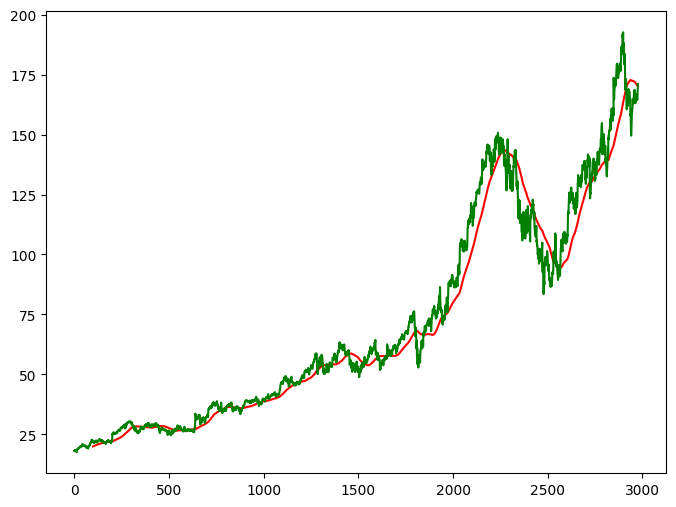

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

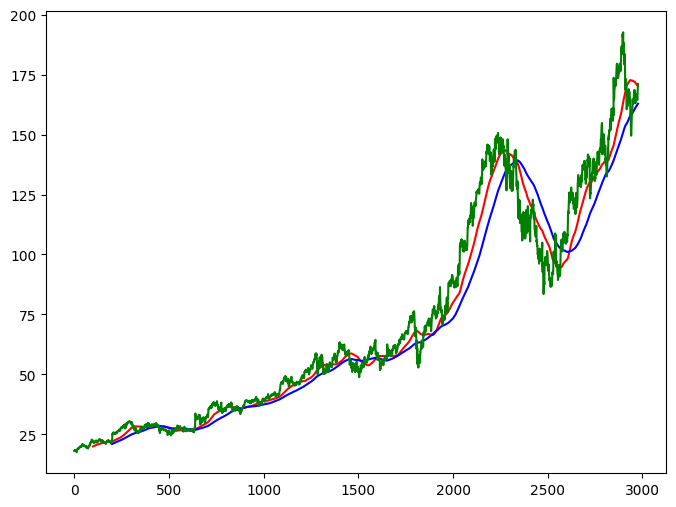

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [ ]:
data_train.shape[0]

2381

In [ ]:
data_test.shape[0]

596

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50 ,batch_size = 32, verbose = 1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - loss: 0.0591
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - loss: 0.0067
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - loss: 0.0052
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0052
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - loss: 0.0052
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - loss: 0.0044
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - loss: 0.0042
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - loss: 0.0038
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - loss: 0.0039
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - loss: 0.0037
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0036
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 258ms/step - loss: 0.0038
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - loss: 0.0029
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - loss: 0.0036
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test],ignore_index = True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [ ]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

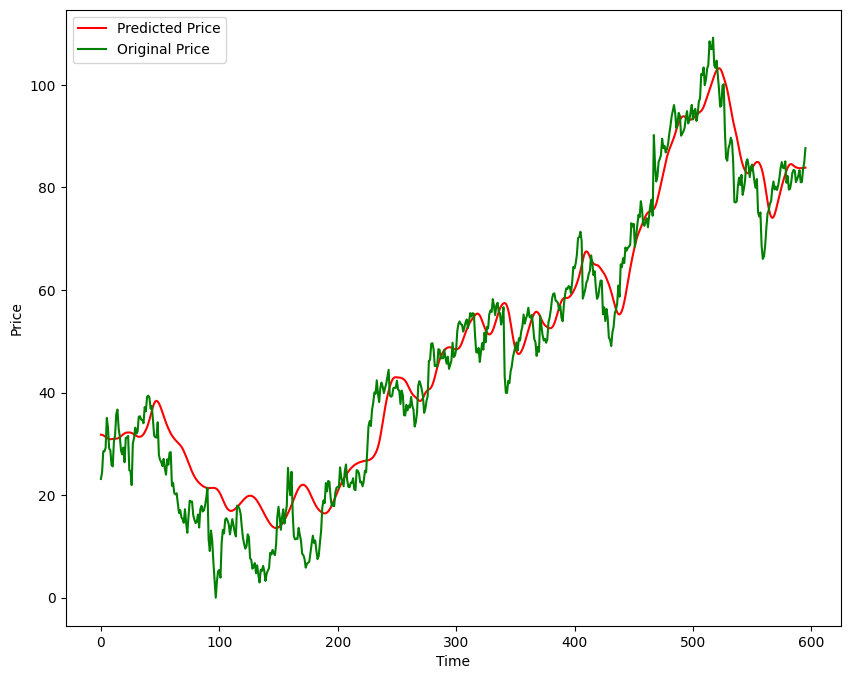

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Prediction Model.keras')